Implementation of Remote Entanglement using Qiskit

In [2]:
from qiskit import *
# Define the Quantum Circuit with 4 qubits 
#let q0 and q1 be the qubits we wish to entangle remotely/indirectly
remote_entanglement = QuantumCircuit(4)
# Apply Hadamard gate to qubits 0 and 1
remote_entanglement.h(0)
remote_entanglement.h(1)
# Apply CNOT gate between qubits 1 and 2 to entangle them
remote_entanglement.cx(1, 2)
# Apply CNOT gate between qubits 0 and 3 to entangle them
remote_entanglement.cx(0, 3)
#now we swap the states of the mediator qubits i.e. q2 and q3
remote_entanglement.cx(2,3)





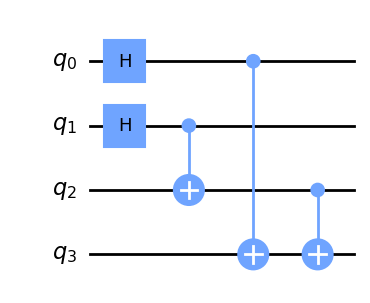

In [3]:
remote_entanglement.draw('mpl')

In [4]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
def execute_circuit_sv(quantum_circuit):
    statevector_simulator = Aer.get_backend('statevector_simulator')
    result = execute(quantum_circuit, statevector_simulator).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw('mpl')
    b_sphere = plot_bloch_multivector(statevector_results)
    
    return statevector_results, circuit_diagram, b_sphere

In [5]:
result, img, bsphere = execute_circuit_sv(remote_entanglement)
img.savefig('img.png')
bsphere.savefig('bsphere.png')

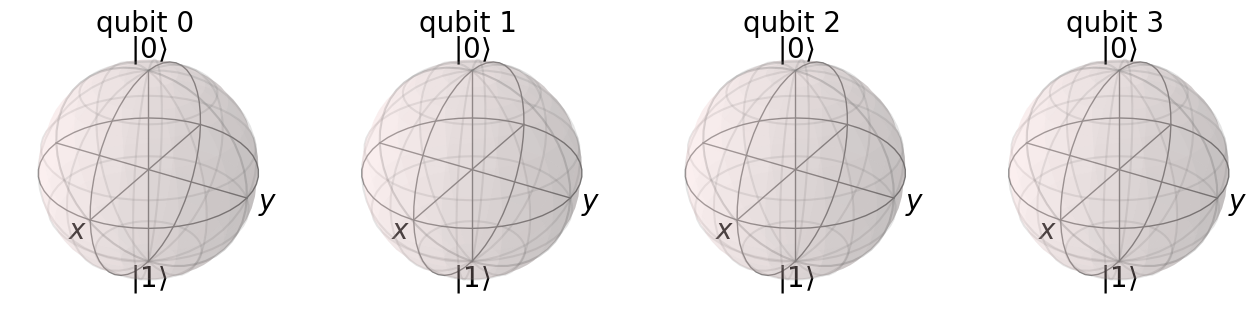

In [6]:
bsphere

In [ ]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()

# Get the counts
counts = result.get_counts(qc)
print(counts)